In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("Student_Performance.csv")

In [12]:
data

,Previous Scores,Performance Index
0,99,91
1,82,65
2,51,45
3,52,36
4,75,66
...,...,...
9995,49,23
9996,64,58
9997,83,74
9998,97,95


In [13]:
data.isnull().sum()

Previous Scores      0
Performance Index    0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Previous Scores    10000 non-null  int64
 1   Performance Index  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [15]:
data.describe()

,Previous Scores,Performance Index
count,10000.000000,10000.000000
mean,69.445700,55.224800
std,17.343152,19.212558
min,40.000000,10.000000
25%,54.000000,40.000000
50%,69.000000,55.000000
75%,85.000000,71.000000
max,99.000000,100.000000


In [16]:
data.shape

(10000, 2)

In [18]:
data["average_score"]=(data["Previous Scores"]+data["Performance Index"])/2

In [19]:
data

,Previous Scores,Performance Index,average_score
0,99,91,95.0
1,82,65,73.5
2,51,45,48.0
3,52,36,44.0
4,75,66,70.5
...,...,...,...
9995,49,23,36.0
9996,64,58,61.0
9997,83,74,78.5
9998,97,95,96.0


In [20]:
marks=40
data["Previous Scores 1"]= np.where(data["Previous Scores"]<marks,"fail","pass")
data["Performance Index 1"]= np.where(data["Performance Index"]<marks,"poor","Excellent")

In [21]:
data

,Previous Scores,Performance Index,average_score,Previous Scores 1,Performance Index 1
0,99,91,95.0,pass,Excellent
1,82,65,73.5,pass,Excellent
2,51,45,48.0,pass,Excellent
3,52,36,44.0,pass,poor
4,75,66,70.5,pass,Excellent
...,...,...,...,...,...
9995,49,23,36.0,pass,poor
9996,64,58,61.0,pass,Excellent
9997,83,74,78.5,pass,Excellent
9998,97,95,96.0,pass,Excellent


In [22]:
data["Previous Scores 1"].value_counts()

Previous Scores 1
pass    10000
Name: count, dtype: int64

In [23]:
data["Performance Index 1"].value_counts()

Performance Index 1
Excellent    7618
poor         2382
Name: count, dtype: int64

In [15]:
#newdf=data.isnull().sum()

In [16]:
#newdf

In [17]:
#newdf.dropna()

In [18]:
data1=pd.read_csv("Student_Performance.csv")
data1

,Previous Scores,Performance Index
0,99,91
1,82,65
2,51,45
3,52,36
4,75,66
...,...,...
9995,49,23
9996,64,58
9997,83,74
9998,97,95


In [21]:
data1['Previous Scores'].corr(data1['Performance Index'])

0.9151891412264476

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Previous Scores'], data['Performance Index'], test_size=0.2, random_state=0)

In [23]:
X_train

7389    95
9275    98
2995    65
5316    43
356     86
        ..
9225    64
4859    78
3264    76
9845    44
2732    83
Name: Previous Scores, Length: 8000, dtype: int64

In [24]:
X_test

9394    67
898     60
2398    90
5906    51
2343    90
        ..
1037    97
2899    48
9549    86
2740    43
6690    41
Name: Previous Scores, Length: 2000, dtype: int64

In [25]:
y_train

7389    83
9275    71
2995    43
5316    23
356     64
        ..
9225    51
4859    68
3264    54
9845    27
2732    76
Name: Performance Index, Length: 8000, dtype: int64

In [26]:
y_test

9394    53
898     50
2398    80
5906    24
2343    64
        ..
1037    91
2899    42
9549    66
2740    27
6690    21
Name: Performance Index, Length: 2000, dtype: int64

In [27]:
new=data1.head(300)

In [28]:
new

,Previous Scores,Performance Index,pass predict
0,99,91,0.0099
1,82,65,0.0082
2,51,45,0.0051
3,52,36,0.0052
4,75,66,0.0075
...,...,...,...
295,99,76,0.0099
296,71,57,0.0071
297,90,82,0.0090
298,60,35,0.0060


In [29]:
x=new['Previous Scores']
y=new['Performance Index']


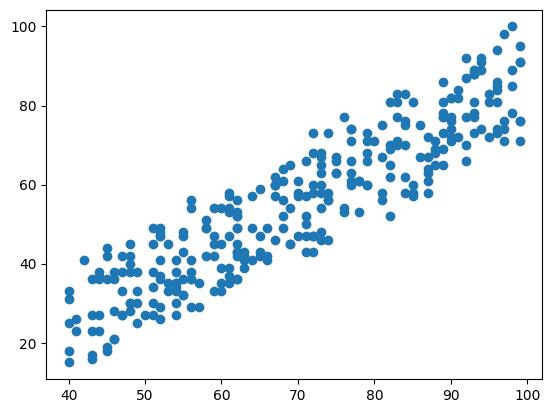

In [30]:
plt.scatter(x,y)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model=LinearRegression()

In [33]:
X=new['Previous Scores']
Y=new['Performance Index']

In [34]:
x1=np.array(X).reshape(-1,1)
y1=np.array(Y).reshape(-1,1)

In [35]:
model.fit(x1,y1)

LinearRegression()

In [36]:
model.intercept_    # slope and mean of 

array([-16.56714188])

In [37]:
model.coef_

array([[1.02678485]])

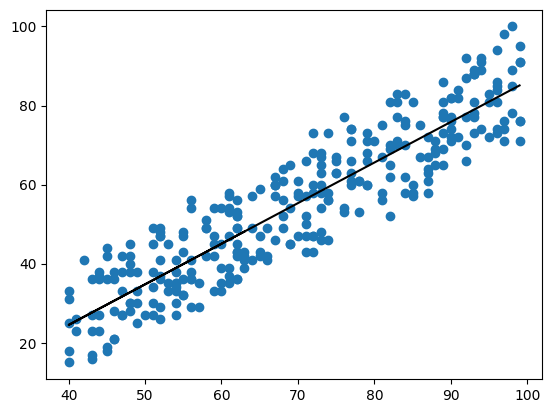

In [38]:
line=model.intercept_+ model.coef_ *x1
plt.scatter(new['Previous Scores'],new['Performance Index'])
plt.plot(x1,line,color="black")

In [39]:
import pickle

In [42]:
with open('linear.pkl','wb') as file:
    pickle.dump(model,file)